# CANH TRAN Notebook - Project 07.

- Author: [Ken McTran](https://github.com/ctranimal )
- Repository: https://github.com/ctranimal/datafun-07-ml 
  
- Purpose: Use all tools learned so far for class -- Data Analysis Fundamentals, to work on a Machine Learning project: supervised learning, via simple linear regression.
- Date: Most recently updated: 8/08/25.

## Setting-Up: Import external packages 
   
#### The purpose of this section is to import external packages that I will need to execute python code subsequently

In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing


## Part 1: Chart a Straight Line
   
#### Setting up to implement C = 5/9 * (f - 32) for conversion between Celcius (C) and Fahrenheit (f):

In [175]:
c = lambda f: 5/9 *(f - 32)
temps = [(f, c(f)) for f in range(0,101,10)]

#### Now, place the data temps into a DataFrame, then use its plot method to display the linear relationship between Fahrenheit and Celsius temperatures.

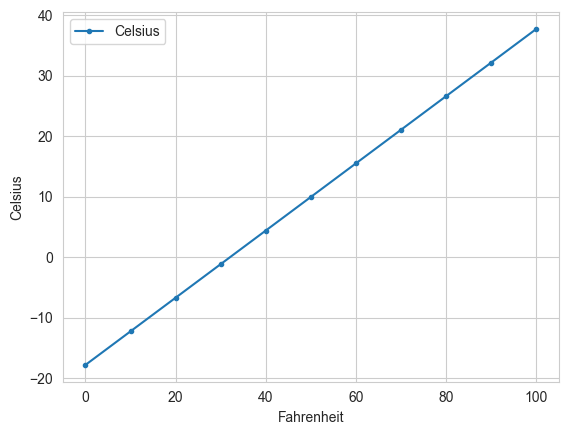

In [176]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part-2 Prediction
#### Corresponding with instructions listed in CC7.6 for Project #7


### Section 1 - Data Acquisition

* I copied ave_hi_nyc*.csv from Deitel's sample data chapter10 folder and placed in in data folder for this project.
* Next step: loading into DataFrame

In [177]:
# Construct the full path to the data file
data_folder_path = os.path.join(os.getcwd(), "data")
sample_file_path = os.path.join(data_folder_path, "ave_hi_nyc_jan_1895-2018.csv")
nyc_df = pd.read_csv(sample_file_path)

### Section 2 - Data Inspection
* Examining NYC data from above by head() and tail()

In [178]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [179]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
1. For readability, rename the 'Value' column as 'Temperature'

In [180]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


2. Check the column's type

In [181]:
nyc_df.Date.dtype

dtype('int64')

3. Continue the 'Data Cleaning' process: Perform 'integer division' of the Date field by 100 to get the year.

In [182]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
#### Obtaining quick Descriptive Statistics to obtain: number of counts, min, max, standard deviation, the mean, 25-percentile, 50-percentile and 75-percentile


In [183]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
#### use stats.linregress() to calculate slope and intercept

In [184]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
my_slope = linear_regression.slope
my_intercept = linear_regression.intercept

print(f"Calculated slope is: {my_slope}, intercept is:{my_intercept}")

Calculated slope is: 0.014771361132966163, intercept is:8.694993233674289


### Section 6 - Predict
#### calculate 'prediction for 2024' by: slope*2024 + intercept

In [185]:
my_prediction = my_slope * 2024 + my_intercept

print(f"Calculated prediction for 2024 is: {my_prediction}")

Calculated prediction for 2024 is: 38.5922281667978


### Section 7 - Visualization

(10.0, 70.0)

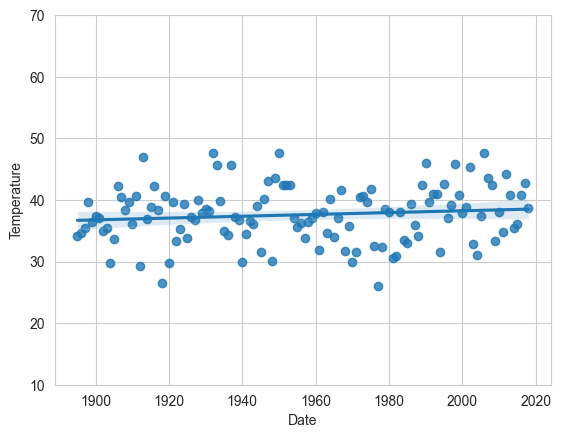

In [186]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

## Part-3 Prediction
#### Corresponding with instructions listed in CC7.7 for Project #7

### Section 1 - Build the Model

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [188]:
X_test.shape

(31, 1)

#### Now, train the model using Linear Regression Fit

In [189]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### View the returned coef_ which is coefficient

In [190]:
linear_regression.coef_

array([0.01939167])

#### View the returned intercept_ which is intercept

In [191]:
linear_regression.intercept_

np.float64(-0.30779820252656265)

### Section 2 - Test the Model

In [192]:
predicted = linear_regression.predict(X_test)
expected = Y_test

for p,e in zip(predicted[::5], expected[::5]):
    print(f"predicted: {p:.2f}, expected: {e:.2f}")

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict 

In [193]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 4 - Visualizations

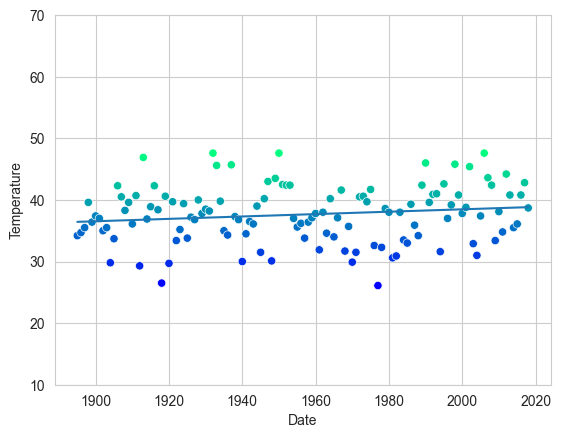

In [194]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10,70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x,y)

## Part-4 Add my Insights
#### Corresponding with instructions listed in CC7.8 for Project #7

### To summarize:
#### Based on part 2, predicted Avg-High January temperature for 2024 is: 38.592

#### Based on part 3, predicted Avg-High January temperature for 2024 is: 38.941

#### Observations:
* I observe that both are pretty good predictions. Based on the both graphs at the end of both parts 2 and 3, the straight line seems to getting closer and closer to the horizontal axis y=40 as x->2025 (from the left). In essence, the estimates for 2024 seems pretty good.

* The question is: which one would be more accurate? I would say the prediction based on the end of part 2 would be more accurate. Why so? because the entire 124 rows (representing years) of data were plotted, and then a line was fitted over it (with least square method to best "fitting the line). Whereas, part 3, used 75% of those rows (or 93 rows) were utilized as "training set". Thus, the resulting "best fit" line would not be as accurate as Part 2, which utilized the entire 124 rows.

* Assuming that 38.592 is more accurate prediction (for year 2024), how far off is the part 3 prediciton of 38.941.

* Let's calculate: (38.941 - 38.592)/38.592 = 0.9%. 

* That is, less than 1% difference between the prediction in part 3 using only 75% of the data provided by the sample CSV. I say that's pretty good prediction!

## Part 5 - BONUS -- Practice with California Housing Dataset.

### Section 1 - Loading the data

### Section 2 - Training the data

### Section 3 - Testing the data

### Section 4 Visualizing the data & choosing the best model from 4 listed.